In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# https://www.statsmodels.org/stable/index.html
import statsmodels.api as sm

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
from functools import partial

In [5]:
from dotenv import load_dotenv

from pathlib import Path

env_path = Path("../../.env-live")

if env_path.exists():
    print('envs Loaded')
    load_dotenv(dotenv_path=env_path)
from jrjModelRegistry.jrjModelRegistry import registerAJrjModel

envs Loaded
Pinged your deployment. You successfully connected to MongoDB!


In [6]:
def generalRegressionPredictor(self, transformedData):
    return self.predict(transformedData)

In [7]:
wagesDf = pd.read_excel("./Wages.xlsx")
# wagesDf = pd.read_excel("https://www.dropbox.com/scl/fi/v7c1c8a3cnncuv1fo28es/Wages.xlsx?rlkey=vli12nwph687hvn9jskgf73a1&st=s862pfm6&dl=1")
wagesDf

,Wage,Educ,Age
0,17.54,12,76
1,20.93,10,61
2,12.94,8,75
3,19.34,6,38
4,24.12,12,59
...,...,...,...
75,25.64,14,74
76,38.77,21,41
77,21.87,15,75
78,27.54,20,46


In [8]:
wagesDf.size

240

In [9]:
wagesDf.describe()

,Wage,Educ,Age
count,80.000000,80.000000,80.000000
mean,24.930500,13.850000,49.487500
std,7.479982,4.016107,17.213473
min,6.930000,6.000000,18.000000
25%,19.145000,10.000000,34.750000
50%,24.980000,14.000000,51.000000
75%,30.572500,17.000000,65.250000
max,43.440000,22.000000,77.000000


In [10]:
wagesDf.shape

(80, 3)

In [11]:
# Plotting
fig1 = plt.figure(
  figsize=(8, 8)
)

<Figure size 800x800 with 0 Axes>

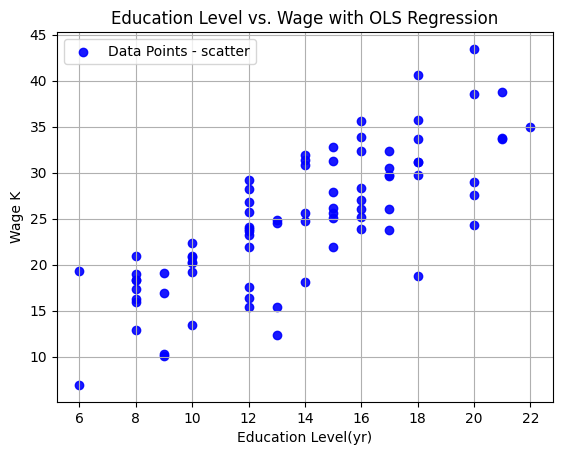

In [12]:
plt.scatter(
  wagesDf["Educ"],
  wagesDf["Wage"],
  color='blue',
  alpha=0.9,
  label='Data Points - scatter',
)


plt.title('Education Level vs. Wage with OLS Regression')
plt.xlabel('Education Level(yr)')
plt.ylabel('Wage K')
plt.legend()
plt.grid(True)



plt.show()

In [13]:
def wageModel1Transformer(dataForTransfer = None):
    import pandas as pd
    import statsmodels.api as sm
    if isinstance(dataForTransfer, pd.DataFrame):
        df = dataForTransfer.copy()
    else:
        df = pd.DataFrame(dataForTransfer)
    dfTransformer = sm.add_constant(df[['Educ']],has_constant='add')
    return dfTransformer

In [14]:
wageModel1 = sm.OLS(
  wagesDf["Wage"],
  wageModel1Transformer(wagesDf)
)
wageModel1Fit = wageModel1.fit()
print(wageModel1Fit.summary())

                            OLS Regression Results                            
Dep. Variable:                   Wage   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     120.4
Date:                Wed, 25 Jun 2025   Prob (F-statistic):           1.75e-17
Time:                        09:55:28   Log-Likelihood:                -236.64
No. Observations:                  80   AIC:                             477.3
Df Residuals:                      78   BIC:                             482.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8341      1.906      2.537      0.0

In [15]:
wage1SampleData = {
    "Educ": [12],
    "Age": [76]
}

In [16]:

wageModel1Fit.transformer = wageModel1Transformer
wageModel1Fit.mainPredictor = partial(generalRegressionPredictor, wageModel1Fit)
registerAJrjModel(
    wageModel1Fit,
    {
        "modelName":f"Daphne_Matrand__wageModel1Fit",
        "version":"1.0.1",
        "params": wageModel1Fit.params.to_dict(),
        "score": float(wageModel1Fit.rsquared),
        "modelLibraray": 'sm.OLS',
        "libraryMetadata": {
            "pvalues": wageModel1Fit.pvalues.to_dict(),
            "r_squared": float(wageModel1Fit.rsquared),
            "adj_r_squared": float(wageModel1Fit.rsquared_adj)
        },
    
        "sampleData": {
            "dataForTransfer": wage1SampleData
        }
    }
)

✅ Uploaded encrypted ZIP to s3://273-g5/Daphne_Matrand__wageModel1Fit__1.0.1.pkl.zip


{'_id': '685c00046daa898960077e8d',
 'modelName': 'Daphne_Matrand__wageModel1Fit',
 'version': '1.0.1',
 'params': {'const': 4.834130434782608, 'Educ': 1.451001412651076},
 'score': 0.6069390066600722,
 'modelLibraray': 'sm.OLS',
 'libraryMetadata': {'pvalues': {'const': 0.013186309373019412,
   'Educ': 1.751528294851552e-17},
  'r_squared': 0.6069390066600722,
  'adj_r_squared': 0.6018997631557141},
 'sampleData': {'dataForTransfer': {'Educ': [12], 'Age': [76]}},
 'modelType': 'model',
 'keepLastOnly': False,
 'modelSizeBytes': 11619,
 'zippedModelSizeBytes': 4467,
 's3Url': '273-g5/Daphne_Matrand__wageModel1Fit__1.0.1.pkl.zip',
 'createdAt': '2025-06-25T13:56:20.119Z',
 'updatedAt': '2025-06-25T13:56:20.119Z'}

In [17]:
predictedWage1 = wageModel1Fit.predict(wageModel1Transformer(wagesDf))
wagesDf['predictedWage1'] = predictedWage1
wagesDf

,Wage,Educ,Age,predictedWage1
0,17.54,12,76,22.246147
1,20.93,10,61,19.344145
2,12.94,8,75,16.442142
3,19.34,6,38,13.540139
4,24.12,12,59,22.246147
...,...,...,...,...
75,25.64,14,74,25.148150
76,38.77,21,41,35.305160
77,21.87,15,75,26.599152
78,27.54,20,46,33.854159


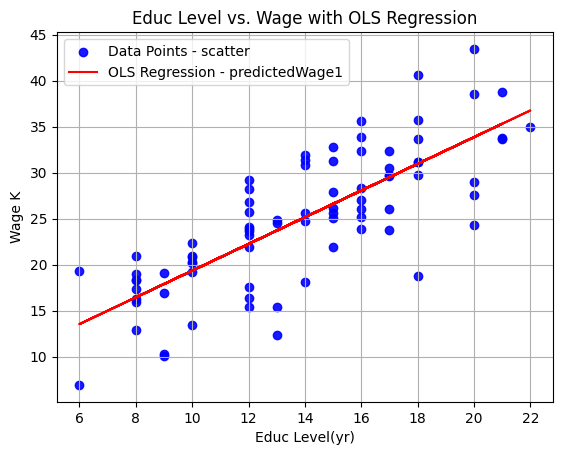

In [18]:
plt.scatter(
  wagesDf["Educ"],
  wagesDf["Wage"],
  color='blue',
  alpha=0.9,
  label='Data Points - scatter',
)

plt.plot(
  wagesDf["Educ"],
  wagesDf["predictedWage1"],
  color='red',
  label='OLS Regression - predictedWage1'
)
plt.title('Educ Level vs. Wage with OLS Regression')
plt.xlabel('Educ Level(yr)')
plt.ylabel('Wage K')
plt.legend()
plt.grid(True)


plt.show()

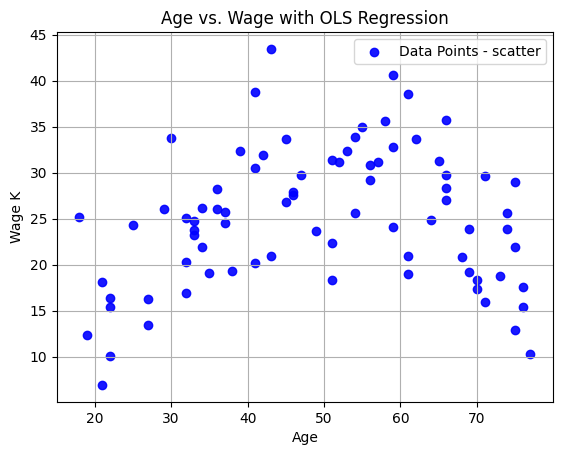

In [19]:
plt.scatter(
  wagesDf["Age"],
  wagesDf["Wage"],
  color='blue',
  alpha=0.9,
  label='Data Points - scatter',
)


plt.title('Age vs. Wage with OLS Regression')
plt.xlabel('Age')
plt.ylabel('Wage K')
plt.legend()
plt.grid(True)



plt.show()

In [20]:
def wageModel2Transformer(dataForTransfer = None):
    import pandas as pd
    import statsmodels.api as sm
    if isinstance(dataForTransfer, pd.DataFrame):
        df = dataForTransfer.copy()
    else:
        df = pd.DataFrame(dataForTransfer)
    dfTransformer = sm.add_constant(df[['Age']],has_constant='add')
    return dfTransformer

In [21]:
wageModel2 = sm.OLS(
  wagesDf["Wage"],
  wageModel2Transformer(wagesDf)
)
wageModel2Fit = wageModel2.fit()
print(wageModel2Fit.summary())

                            OLS Regression Results                            
Dep. Variable:                   Wage   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     1.718
Date:                Wed, 25 Jun 2025   Prob (F-statistic):              0.194
Time:                        09:58:50   Log-Likelihood:                -273.12
No. Observations:                  80   AIC:                             550.2
Df Residuals:                      78   BIC:                             555.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.7740      2.548      8.544      0.0

In [22]:
wageModel2Fit.transformer = wageModel2Transformer
wageModel2Fit.mainPredictor = partial(generalRegressionPredictor, wageModel2Fit)
registerAJrjModel(
    wageModel2Fit,
    {
        "modelName":f"Daphne_Matrand__wageModel2Fit",
        "version":"1.0.1",
        "params": wageModel2Fit.params.to_dict(),
        "score": float(wageModel2Fit.rsquared),
        "modelLibraray": 'sm.OLS',
        "libraryMetadata": {
            "pvalues": wageModel2Fit.pvalues.to_dict(),
            "r_squared": float(wageModel2Fit.rsquared),
            "adj_r_squared": float(wageModel2Fit.rsquared_adj)
        },
    
        "sampleData": {
            "dataForTransfer": wage1SampleData
        }
    }
)

✅ Uploaded encrypted ZIP to s3://273-g5/Daphne_Matrand__wageModel2Fit__1.0.1.pkl.zip


{'_id': '685c00d76daa898960077e8e',
 'modelName': 'Daphne_Matrand__wageModel2Fit',
 'version': '1.0.1',
 'params': {'const': 21.773998971504923, 'Age': 0.06378380456671041},
 'score': 0.021545505898977746,
 'modelLibraray': 'sm.OLS',
 'libraryMetadata': {'pvalues': {'const': 8.2714353587275e-13,
   'Age': 0.19385395523515433},
  'r_squared': 0.021545505898977746,
  'adj_r_squared': 0.009001217513067261},
 'sampleData': {'dataForTransfer': {'Educ': [12], 'Age': [76]}},
 'modelType': 'model',
 'keepLastOnly': False,
 'modelSizeBytes': 11617,
 'zippedModelSizeBytes': 5042,
 's3Url': '273-g5/Daphne_Matrand__wageModel2Fit__1.0.1.pkl.zip',
 'createdAt': '2025-06-25T13:59:51.804Z',
 'updatedAt': '2025-06-25T13:59:51.804Z'}

In [23]:
predictedWage2 = wageModel2Fit.predict(wageModel2Transformer(wagesDf))
wagesDf['predictedWage2'] = predictedWage2
wagesDf

,Wage,Educ,Age,predictedWage1,predictedWage2
0,17.54,12,76,22.246147,26.621568
1,20.93,10,61,19.344145,25.664811
2,12.94,8,75,16.442142,26.557784
3,19.34,6,38,13.540139,24.197784
4,24.12,12,59,22.246147,25.537243
...,...,...,...,...,...
75,25.64,14,74,25.148150,26.494001
76,38.77,21,41,35.305160,24.389135
77,21.87,15,75,26.599152,26.557784
78,27.54,20,46,33.854159,24.708054


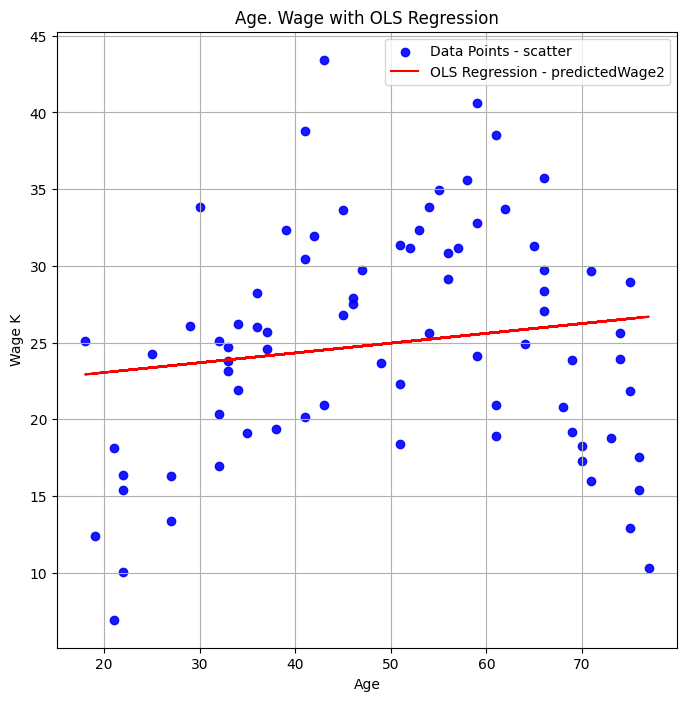

In [24]:
# Plotting
plt.figure(
  figsize=(8, 8)
)

plt.scatter(
  wagesDf["Age"],
  wagesDf["Wage"],
  color='blue',
  alpha=0.9,
  label='Data Points - scatter',
)

plt.plot(
  wagesDf["Age"],
  wagesDf["predictedWage2"],
  color='red',
  label='OLS Regression - predictedWage2'
)
plt.title('Age. Wage with OLS Regression')
plt.xlabel('Age')
plt.ylabel('Wage K')
plt.legend()
plt.grid(True)



plt.show()

In [25]:
def wageModel3Transformer(dataForTransfer = None):
    import pandas as pd
    import statsmodels.api as sm
    if isinstance(dataForTransfer, pd.DataFrame):
        df = dataForTransfer.copy()
    else:
        df = pd.DataFrame(dataForTransfer)
    df['agePower2'] = df.apply(lambda row: row['Age'] * row['Age'], axis=1)
    dfTransformer = sm.add_constant(df[['Age', 'agePower2']],has_constant='add')
    return dfTransformer

In [26]:
wageModel3 = sm.OLS(
  wagesDf["Wage"],
  wageModel3Transformer(wagesDf)
)
wageModel3Fit = wageModel3.fit()
print(wageModel3Fit.summary())

                            OLS Regression Results                            
Dep. Variable:                   Wage   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                     25.72
Date:                Wed, 25 Jun 2025   Prob (F-statistic):           2.79e-09
Time:                        10:00:38   Log-Likelihood:                -253.53
No. Observations:                  80   AIC:                             513.1
Df Residuals:                      77   BIC:                             520.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -14.4664      5.569     -2.598      0.0

In [27]:
wageModel3Fit.transformer = wageModel3Transformer
wageModel3Fit.mainPredictor = partial(generalRegressionPredictor, wageModel3Fit)
registerAJrjModel(
    wageModel3Fit,
    {
        "modelName":f"Daphne_Matrand__wageModel3Fit",
        "version":"1.0.1",
        "params": wageModel3Fit.params.to_dict(),
        "score": float(wageModel3Fit.rsquared),
        "modelLibraray": 'sm.OLS',
        "libraryMetadata": {
            "pvalues": wageModel3Fit.pvalues.to_dict(),
            "r_squared": float(wageModel3Fit.rsquared),
            "adj_r_squared": float(wageModel3Fit.rsquared_adj)
        },
    
        "sampleData": {
            "dataForTransfer": wage1SampleData
        }
    }
)

✅ Uploaded encrypted ZIP to s3://273-g5/Daphne_Matrand__wageModel3Fit__1.0.1.pkl.zip


{'_id': '685c01336daa898960077e8f',
 'modelName': 'Daphne_Matrand__wageModel3Fit',
 'version': '1.0.1',
 'params': {'const': -14.466356558668878,
  'Age': 1.7566765630160024,
  'agePower2': -0.017338947372608066},
 'score': 0.40047350961402783,
 'modelLibraray': 'sm.OLS',
 'libraryMetadata': {'pvalues': {'const': 0.0112454630415267,
   'Age': 4.3104537364193037e-10,
   'agePower2': 9.220927533643406e-10},
  'r_squared': 0.40047350961402783,
  'adj_r_squared': 0.384901392980626},
 'sampleData': {'dataForTransfer': {'Educ': [12], 'Age': [76]}},
 'modelType': 'model',
 'keepLastOnly': False,
 'modelSizeBytes': 13888,
 'zippedModelSizeBytes': 5925,
 's3Url': '273-g5/Daphne_Matrand__wageModel3Fit__1.0.1.pkl.zip',
 'createdAt': '2025-06-25T14:01:23.998Z',
 'updatedAt': '2025-06-25T14:01:23.998Z'}

In [28]:
predictedWage3 = wageModel3Fit.predict(wageModel3Transformer(wagesDf))
wagesDf['predictedWage3'] = predictedWage3
wagesDf

,Wage,Educ,Age,predictedWage1,predictedWage2,predictedWage3
0,17.54,12,76,22.246147,26.621568,18.891302
1,20.93,10,61,19.344145,25.664811,28.172691
2,12.94,8,75,16.442142,26.557784,19.752807
3,19.34,6,38,13.540139,24.197784,27.249913
4,24.12,12,59,22.246147,25.537243,28.820685
...,...,...,...,...,...,...
75,25.64,14,74,25.148150,26.494001,20.579633
76,38.77,21,41,35.305160,24.389135,28.410612
77,21.87,15,75,26.599152,26.557784,19.752807
78,27.54,20,46,33.854159,24.708054,29.651553


In [29]:
wagesDf = wagesDf.sort_values(by="Age")

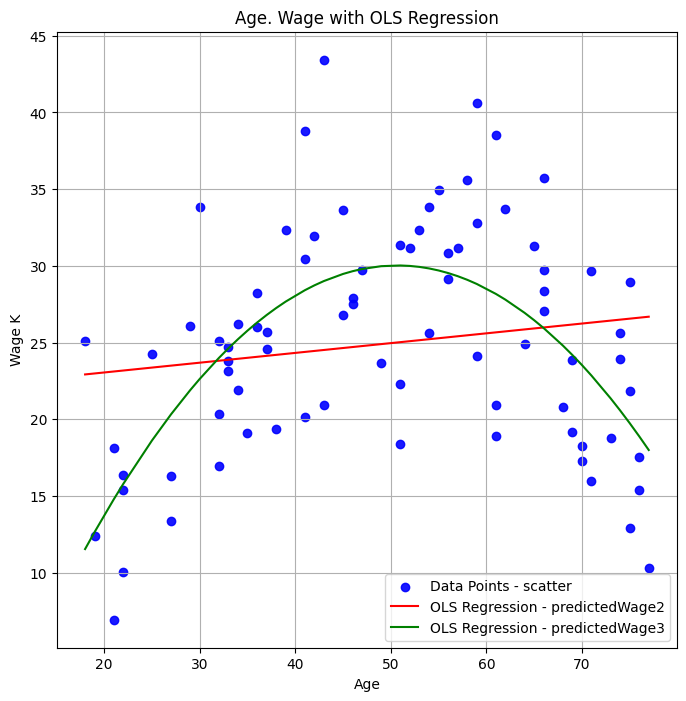

In [30]:
# Plotting
plt.figure(
  figsize=(8, 8)
)

plt.scatter(
  wagesDf["Age"],
  wagesDf["Wage"],
  color='blue',
  alpha=0.9,
  label='Data Points - scatter',
)

plt.plot(
  wagesDf["Age"],
  wagesDf["predictedWage2"],
  color='red',
  label='OLS Regression - predictedWage2'
)

plt.plot(
  wagesDf["Age"],
  wagesDf["predictedWage3"],
  color='green',
  label='OLS Regression - predictedWage3'
)
plt.title('Age. Wage with OLS Regression')
plt.xlabel('Age')
plt.ylabel('Wage K')
plt.legend()
plt.grid(True)



plt.show()

In [31]:
wagesDf

,Wage,Educ,Age,predictedWage1,predictedWage2,predictedWage3
69,25.13,16,18,28.050153,22.922107,11.536003
27,12.39,13,19,23.697149,22.985891,12.651138
60,18.11,14,21,25.148150,23.113459,14.777375
62,6.93,6,21,13.540139,23.113459,14.777375
56,10.03,9,22,17.893143,23.177243,15.788477
...,...,...,...,...,...,...
48,28.95,20,75,33.854159,26.557784,19.752807
77,21.87,15,75,26.599152,26.557784,19.752807
0,17.54,12,76,22.246147,26.621568,18.891302
67,15.38,12,76,22.246147,26.621568,18.891302


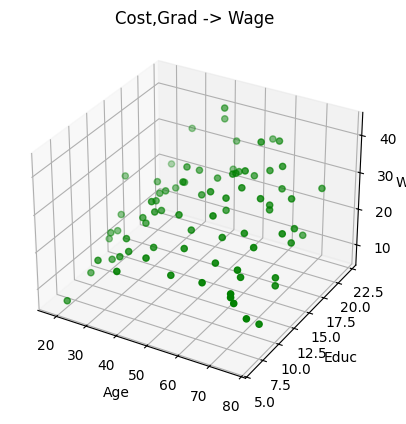

In [32]:
fig = plt.figure()
ax = plt.axes(projection ="3d")

# Creating plot
ax.scatter3D(
  wagesDf["Age"],
  wagesDf["Educ"],
  wagesDf["Wage"],
  color = "green"
)
plt.title("Cost,Grad -> Wage")
ax.set_xlabel('Age')
ax.set_ylabel('Educ')
ax.set_zlabel('Wage')

# show plot
plt.show()

In [33]:
def wageModel4Transformer(dataForTransfer = None):
    import pandas as pd
    import statsmodels.api as sm
    if isinstance(dataForTransfer, pd.DataFrame):
        df = dataForTransfer.copy()
    else:
        df = pd.DataFrame(dataForTransfer)
    dfTransformer = sm.add_constant(df[['Educ','Age']],has_constant='add')
    return dfTransformer

In [34]:
wageModel4 = sm.OLS(
  wagesDf["Wage"],
  wageModel4Transformer(wagesDf)
)
wageModel4Fit = wageModel4.fit()
print(wageModel4Fit.summary())

                            OLS Regression Results                            
Dep. Variable:                   Wage   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     62.47
Date:                Wed, 25 Jun 2025   Prob (F-statistic):           7.57e-17
Time:                        10:02:00   Log-Likelihood:                -235.42
No. Observations:                  80   AIC:                             476.8
Df Residuals:                      77   BIC:                             484.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6381      2.366      1.115      0.2

In [35]:
wageModel4Fit.transformer = wageModel4Transformer
wageModel4Fit.mainPredictor = partial(generalRegressionPredictor, wageModel4Fit)
registerAJrjModel(
    wageModel4Fit,
    {
        "modelName":f"Daphne_Matrand__wageModel4Fit",
        "version":"1.0.1",
        "params": wageModel4Fit.params.to_dict(),
        "score": float(wageModel4Fit.rsquared),
        "modelLibraray": 'sm.OLS',
        "libraryMetadata": {
            "pvalues": wageModel4Fit.pvalues.to_dict(),
            "r_squared": float(wageModel4Fit.rsquared),
            "adj_r_squared": float(wageModel4Fit.rsquared_adj)
        },
    
        "sampleData": {
            "dataForTransfer": wage1SampleData
        }
    }
)

✅ Uploaded encrypted ZIP to s3://273-g5/Daphne_Matrand__wageModel4Fit__1.0.1.pkl.zip


{'_id': '685c01626daa898960077e90',
 'modelName': 'Daphne_Matrand__wageModel4Fit',
 'version': '1.0.1',
 'params': {'const': 2.638084675821656,
  'Educ': 1.4410114018021116,
  'Age': 0.04717165767555586},
 'score': 0.6186943830264385,
 'modelLibraray': 'sm.OLS',
 'libraryMetadata': {'pvalues': {'const': 0.26841827476834956,
   'Educ': 2.0149937253541556e-17,
   'Age': 0.12748187201040145},
  'r_squared': 0.6186943830264385,
  'adj_r_squared': 0.6087903410271253},
 'sampleData': {'dataForTransfer': {'Educ': [12], 'Age': [76]}},
 'modelType': 'model',
 'keepLastOnly': False,
 'modelSizeBytes': 14920,
 'zippedModelSizeBytes': 6226,
 's3Url': '273-g5/Daphne_Matrand__wageModel4Fit__1.0.1.pkl.zip',
 'createdAt': '2025-06-25T14:02:10.730Z',
 'updatedAt': '2025-06-25T14:02:10.730Z'}

In [36]:
predictedWage4 = wageModel4Fit.predict(
  wageModel4Transformer(wagesDf)
)
wagesDf['predictedWage4'] = predictedWage4
wagesDf

,Wage,Educ,Age,predictedWage1,predictedWage2,predictedWage3,predictedWage4
69,25.13,16,18,28.050153,22.922107,11.536003,26.543357
27,12.39,13,19,23.697149,22.985891,12.651138,22.267494
60,18.11,14,21,25.148150,23.113459,14.777375,23.802849
62,6.93,6,21,13.540139,23.113459,14.777375,12.274758
56,10.03,9,22,17.893143,23.177243,15.788477,16.644964
...,...,...,...,...,...,...,...
48,28.95,20,75,33.854159,26.557784,19.752807,34.996187
77,21.87,15,75,26.599152,26.557784,19.752807,27.791130
0,17.54,12,76,22.246147,26.621568,18.891302,23.515267
67,15.38,12,76,22.246147,26.621568,18.891302,23.515267


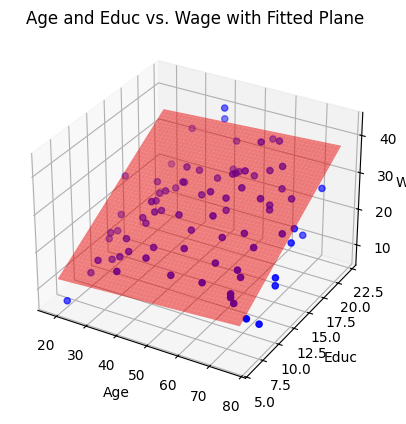

In [37]:
# Extracting coefficients
intercept = wageModel4Fit.params['const']
coefAge = wageModel4Fit.params['Age']
coefEduc = wageModel4Fit.params['Educ']

# Create 3D grid for plotting
ageRange = np.linspace(wagesDf['Age'].min(), wagesDf['Age'].max(), 100)
educRange = np.linspace(wagesDf['Educ'].min(), wagesDf['Educ'].max(), 100)
ageGrid, educGrid = np.meshgrid(ageRange, educRange)

# Calculate predicted Wage for each combination of Age and Educ
wagePredictEq = intercept + coefAge * ageGrid + coefEduc * educGrid




fig = plt.figure()
ax = plt.axes(projection ="3d")

# Scatter plot of the actual data points
ax.scatter(wagesDf['Age'], wagesDf['Educ'], wagesDf['Wage'], color='blue', label='Actual Wage')

# Plotting the fitted plane
ax.plot_surface(ageGrid, educGrid, wagePredictEq, color='red', alpha=0.5, label='Fitted Plane')

# Labeling axes
ax.set_xlabel('Age')
ax.set_ylabel('Educ')
ax.set_zlabel('Wage')



plt.title('Age and Educ vs. Wage with Fitted Plane')

# Rotating the plot
# ax.view_init(elev=45, azim=45)  # Set the elevation and azimuth angles
plt.show()


In [38]:
def wageModel5Transformer(dataForTransfer = None):
    import pandas as pd
    import statsmodels.api as sm
    if isinstance(dataForTransfer, pd.DataFrame):
        df = dataForTransfer.copy()
    else:
        df = pd.DataFrame(dataForTransfer)
    df['agePower2'] = df.apply(lambda row: row['Age'] * row['Age'], axis=1)
    dfTransformer = sm.add_constant(df[['Educ','Age', 'agePower2']],has_constant='add')
    return dfTransformer
wageModel5 = sm.OLS(
  wagesDf["Wage"],
  wageModel5Transformer(wagesDf)
)
wageModel5Fit = wageModel5.fit()
print(wageModel5Fit.summary())

                            OLS Regression Results                            
Dep. Variable:                   Wage   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     125.7
Date:                Wed, 25 Jun 2025   Prob (F-statistic):           2.18e-29
Time:                        10:02:31   Log-Likelihood:                -202.56
No. Observations:                  80   AIC:                             413.1
Df Residuals:                      76   BIC:                             422.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -22.7219      3.023     -7.517      0.0

In [39]:
wageModel5Fit.transformer = wageModel5Transformer
wageModel5Fit.mainPredictor = partial(generalRegressionPredictor, wageModel5Fit)
registerAJrjModel(
    wageModel5Fit,
    {
        "modelName":f"Daphne_Matrand__wageModel5Fit",
        "version":"1.0.1",
        "params": wageModel5Fit.params.to_dict(),
        "score": float(wageModel5Fit.rsquared),
        "modelLibraray": 'sm.OLS',
        "libraryMetadata": {
            "pvalues": wageModel5Fit.pvalues.to_dict(),
            "r_squared": float(wageModel5Fit.rsquared),
            "adj_r_squared": float(wageModel5Fit.rsquared_adj)
        },
    
        "sampleData": {
            "dataForTransfer": wage1SampleData
        }
    }
)

✅ Uploaded encrypted ZIP to s3://273-g5/Daphne_Matrand__wageModel5Fit__1.0.1.pkl.zip


{'_id': '685c01846daa898960077e91',
 'modelName': 'Daphne_Matrand__wageModel5Fit',
 'version': '1.0.1',
 'params': {'const': -22.721935553334106,
  'Educ': 1.2539588172315868,
  'Age': 1.3500018331955084,
  'agePower2': -0.01332176220585009},
 'score': 0.8323164285980976,
 'modelLibraray': 'sm.OLS',
 'libraryMetadata': {'pvalues': {'const': 9.217112647402962e-11,
   'Educ': 1.0072348633833986e-22,
   'Age': 1.188544404430349e-15,
   'agePower2': 3.3412391971000617e-15},
  'r_squared': 0.8323164285980976,
  'adj_r_squared': 0.8256973402532857},
 'sampleData': {'dataForTransfer': {'Educ': [12], 'Age': [76]}},
 'modelType': 'model',
 'keepLastOnly': False,
 'modelSizeBytes': 17206,
 'zippedModelSizeBytes': 7200,
 's3Url': '273-g5/Daphne_Matrand__wageModel5Fit__1.0.1.pkl.zip',
 'createdAt': '2025-06-25T14:02:44.920Z',
 'updatedAt': '2025-06-25T14:02:44.920Z'}

In [40]:
predictedWage5 = wageModel5Fit.predict(
  wageModel5Transformer(wagesDf)
)
wagesDf['predictedWage5'] = predictedWage5
wagesDf

,Wage,Educ,Age,predictedWage1,predictedWage2,predictedWage3,predictedWage4,predictedWage5
69,25.13,16,18,28.050153,22.922107,11.536003,26.543357,17.325188
27,12.39,13,19,23.697149,22.985891,12.651138,22.267494,14.420408
60,18.11,14,21,25.148150,23.113459,14.777375,23.802849,17.308629
62,6.93,6,21,13.540139,23.113459,14.777375,12.274758,7.276959
56,10.03,9,22,17.893143,23.177243,15.788477,16.644964,11.816001
...,...,...,...,...,...,...,...,...
48,28.95,20,75,33.854159,26.557784,19.752807,34.996187,28.672466
77,21.87,15,75,26.599152,26.557784,19.752807,27.791130,22.402672
0,17.54,12,76,22.246147,26.621568,18.891302,23.515267,17.979211
67,15.38,12,76,22.246147,26.621568,18.891302,23.515267,17.979211


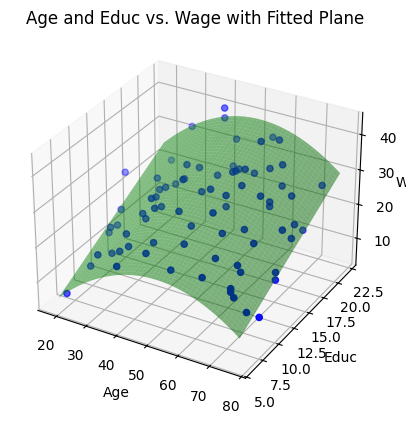

In [41]:
# Extracting coefficients
intercept2 = wageModel5Fit.params['const']
coefAge2 = wageModel5Fit.params['Age']
coefEduc2 = wageModel5Fit.params['Educ']
coefAgePower22 = wageModel5Fit.params['agePower2']

# Create 3D grid for plotting
ageRange = np.linspace(wagesDf['Age'].min(), wagesDf['Age'].max(), 100)
educRange = np.linspace(wagesDf['Educ'].min(), wagesDf['Educ'].max(), 100)
ageGrid, educGrid = np.meshgrid(ageRange, educRange)

# Calculate predicted Wage for each combination of Age and Educ
wagePredictEq2 = intercept2 + coefAge2 * ageGrid + coefEduc2 * educGrid + coefAgePower22 * ageGrid * ageGrid




fig = plt.figure()
ax = plt.axes(projection ="3d")

# Scatter plot of the actual data points
ax.scatter(wagesDf['Age'], wagesDf['Educ'], wagesDf['Wage'], color='blue', label='Actual Wage')



# Plotting the fitted plane
ax.plot_surface(ageGrid, educGrid, wagePredictEq2, color='green', alpha=0.5, label='Fitted Plane')

# Labeling axes
ax.set_xlabel('Age')
ax.set_ylabel('Educ')
ax.set_zlabel('Wage')



plt.title('Age and Educ vs. Wage with Fitted Plane')

# Rotating the plot
# ax.view_init(elev=45, azim=45)  # Set the elevation and azimuth angles
plt.show()

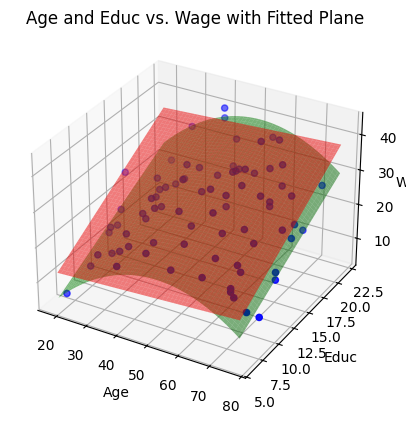

In [42]:


fig = plt.figure()
ax = plt.axes(projection ="3d")

# Scatter plot of the actual data points
ax.scatter(wagesDf['Age'], wagesDf['Educ'], wagesDf['Wage'], color='blue', label='Actual Wage')

# Plotting the fitted plane
ax.plot_surface(ageGrid, educGrid, wagePredictEq, color='red', alpha=0.5, label='Fitted Plane')


# Plotting the fitted plane
ax.plot_surface(ageGrid, educGrid, wagePredictEq2, color='green', alpha=0.5, label='Fitted Plane')

# Labeling axes
ax.set_xlabel('Age')
ax.set_ylabel('Educ')
ax.set_zlabel('Wage')



plt.title('Age and Educ vs. Wage with Fitted Plane')

# Rotating the plot
# ax.view_init(elev=45, azim=45)  # Set the elevation and azimuth angles
plt.show()

In [43]:
## AFTER AREFULLY LOOKUP WE RELIZED  wageModel5Fit SO LETS KEEP IT AS THE BEST

In [44]:
compareDf = pd.read_csv('./wageModelsComparison.csv')
compareDf

,Models,wageModel1Fit,wageModel2Fit,wageModel3,wageModel4,wageModel5Fit
0,Comments,Linear,Linear,Qud,Linear,NaN
1,Intercept,4.834 0.013,21.77 0.0,-14.466 0.01,2.6381 0.268,-22.7219 0.0
2,Educ,1.45 0.0,x,x,1.441 0.0,1.254 0.0
3,Age,x,0.0638 0.194,1.7567 0.0,0.0472 0.127 *,1.35 0.0
4,Age^2,NaN,NaN,-0.0173 0.0,NaN,-0.0133 0.0
5,NaN,NaN,NaN,NaN,NaN,NaN
6,R2,0.607,0.022,0.4,0.619,0.832 Best


In [45]:
registerAJrjModel(
    wageModel5Fit,
    {
        "modelName":f"Daphne_Matrand__wageModelBEST",
        "version":"1.0.1",
        "params": wageModel5Fit.params.to_dict(),
        "score": float(wageModel5Fit.rsquared),
        "modelLibraray": 'sm.OLS',
        "libraryMetadata": {
            "pvalues": wageModel5Fit.pvalues.to_dict(),
            "r_squared": float(wageModel5Fit.rsquared),
            "adj_r_squared": float(wageModel5Fit.rsquared_adj)
        },
    
        "sampleData": {
            "dataForTransfer": wage1SampleData
        }
    }
)

✅ Uploaded encrypted ZIP to s3://273-g5/Daphne_Matrand__wageModelBEST__1.0.1.pkl.zip


{'_id': '685c01a76daa898960077e92',
 'modelName': 'Daphne_Matrand__wageModelBEST',
 'version': '1.0.1',
 'params': {'const': -22.721935553334106,
  'Educ': 1.2539588172315868,
  'Age': 1.3500018331955084,
  'agePower2': -0.01332176220585009},
 'score': 0.8323164285980976,
 'modelLibraray': 'sm.OLS',
 'libraryMetadata': {'pvalues': {'const': 9.217112647402962e-11,
   'Educ': 1.0072348633833986e-22,
   'Age': 1.188544404430349e-15,
   'agePower2': 3.3412391971000617e-15},
  'r_squared': 0.8323164285980976,
  'adj_r_squared': 0.8256973402532857},
 'sampleData': {'dataForTransfer': {'Educ': [12], 'Age': [76]}},
 'modelType': 'model',
 'keepLastOnly': False,
 'modelSizeBytes': 17206,
 'zippedModelSizeBytes': 7200,
 's3Url': '273-g5/Daphne_Matrand__wageModelBEST__1.0.1.pkl.zip',
 'createdAt': '2025-06-25T14:03:19.383Z',
 'updatedAt': '2025-06-25T14:03:19.383Z'}